In [ ]:
%reload_ext autoreload
%autoreload 2

import sys
sys.path.append("..")

import matplotlib.pyplot as plt
plt.rc('axes', labelsize=15) 

import seaborn as sns

import numpy as np
import pandas as pd

from src.datasets import configs, data
from utils.plotting_utils import plot_random_dataset_images

In [ ]:
default_cfg = configs.SpriteWorldConfig()
default_cfg

SpriteWorldConfig(x=Range(min=0.1, max=0.9), y=Range(min=0.2, max=0.8), shape=['triangle', 'square'], scale=Range(min=0.09, max=0.22), angle=Range(min=0, max=0), c0=Range(min=0.05, max=0.95), c1=Range(min=1, max=1), c2=Range(min=1, max=1))

## Random Sampling

Generating images (sampling: random): 100%|██████████| 1000/1000 [00:04<00:00, 246.54it/s]


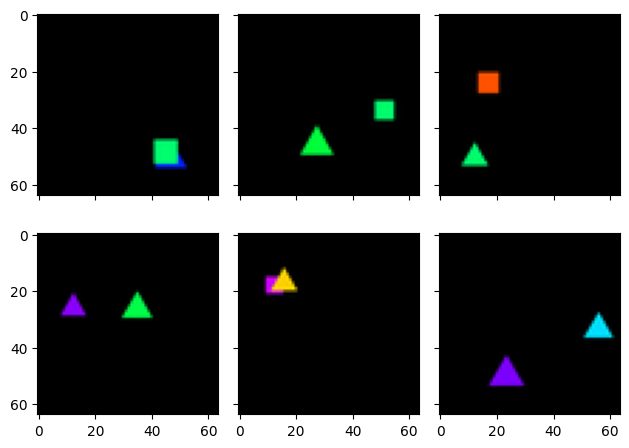

In [9]:
n_samples = 1000
n_slots = 2
sample_mode = "random"
random_dataset = data.SpriteWorldDataset(n_samples, n_slots, default_cfg, sample_mode=sample_mode)
plot_random_dataset_images(random_dataset)

## Diagonal Sampling

Generating images (sampling: diagonal): 100%|██████████| 1000/1000 [00:03<00:00, 287.52it/s]


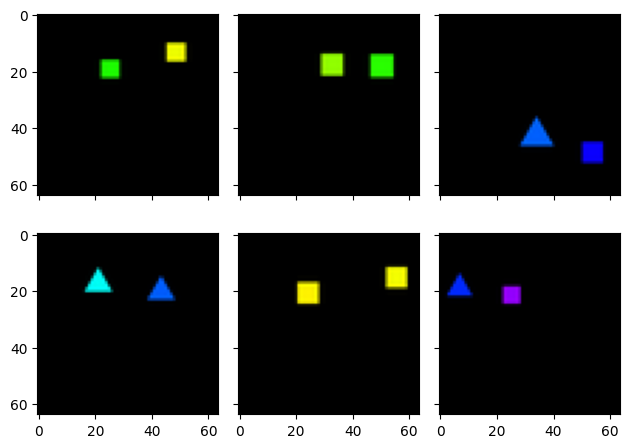

Generating images (sampling: diagonal): 100%|██████████| 1000/1000 [00:03<00:00, 274.34it/s]


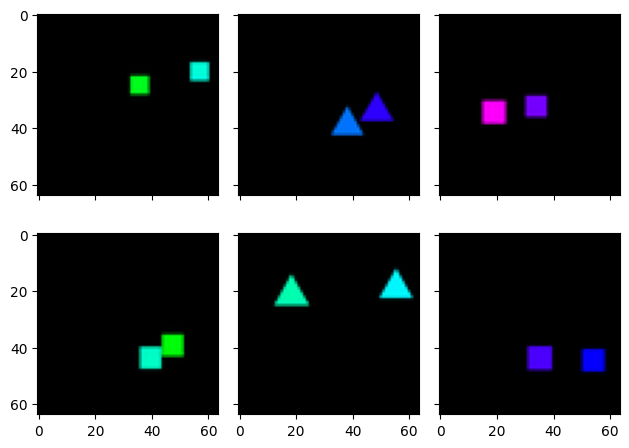

In [10]:
delta = 0.125
sample_mode = "diagonal"
n_slots = 2
for no_overlap in [True, False]:
    diagonal_dataset = data.SpriteWorldDataset(n_samples, n_slots, default_cfg, sample_mode=sample_mode, 
                                                no_overlap=no_overlap,
                                                delta=delta)
    plot_random_dataset_images(diagonal_dataset)


## Off-Diagonal Sampling

Generating images (sampling: off_diagonal): 100%|██████████| 1000/1000 [00:03<00:00, 287.35it/s]


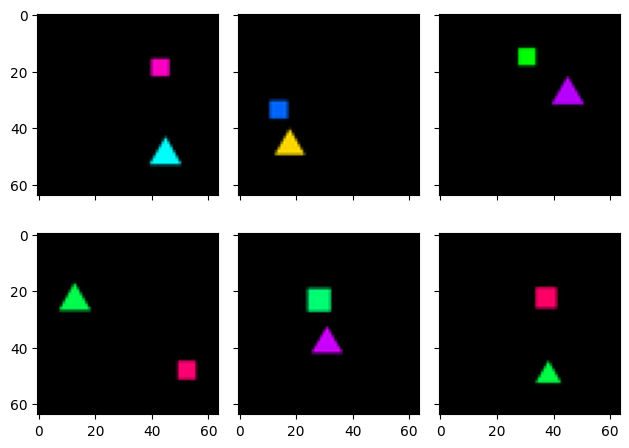

In [11]:
n_slots = 2
sample_mode = "off_diagonal"
delta = 0.125

off_diagonal_dataset = data.SpriteWorldDataset(
    n_samples, n_slots, default_cfg, sample_mode=sample_mode, delta=delta
)
plot_random_dataset_images(off_diagonal_dataset)

In [12]:
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt


def plot_with_slider(dataset):
    n_samples = len(dataset)

    def plot_sample(sample_idx):
        # Get image and latent from dataset
        image, latent = dataset[sample_idx]

        # Plotting
        plt.figure(figsize=(6, 6))
        plt.imshow(
            image[-1].permute(1, 2, 0).detach().cpu().numpy()
        )  # Assuming the image is a PyTorch tensor with shape (C, H, W)
        plt.title(f"Latent: {latent}")
        plt.axis("off")
        plt.show()

    widgets.interact(
        plot_sample,
        sample_idx=widgets.IntSlider(min=0, max=n_samples - 1, step=1, value=0),
    )

In [13]:
plot_with_slider(off_diagonal_dataset)